## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

## Installing and Importing the necessary libraries

In [9]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [54]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Library to split data

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# to oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# to create a decision tree
from sklearn.tree import DecisionTreeClassifier

# to create ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# to create extreme gradient boosting
from xgboost import XGBClassifier


# to evaluate models
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# to tune  models
from sklearn.model_selection import RandomizedSearchCV


#---------------------------------------------------------
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

## Import Dataset

In [11]:
df = pd.read_csv('/content/sample_data/EasyVisa.csv')
pd.set_option('display.width', 300)

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [12]:

print("\nDisplay first 5 and last 10 records\n", pd.concat([df.head(5), df.tail(10)])) #Reviewing first 5 rows and last 10 rows to understand the data content



Display first 5 and last 10 records
          case_id      continent education_of_employee has_job_experience requires_job_training  no_of_employees  yr_of_estab region_of_employment  prevailing_wage unit_of_wage full_time_position case_status
0         EZYV01           Asia           High School                  N                     N            14513         2007                 West         592.2029         Hour                  Y      Denied
1         EZYV02           Asia              Master's                  Y                     N             2412         2002            Northeast       83425.6500         Year                  Y   Certified
2         EZYV03           Asia            Bachelor's                  N                     Y            44444         2008                 West      122996.8600         Year                  Y      Denied
3         EZYV04           Asia            Bachelor's                  N                     N               98         1897          

#### Understand the shape of the dataset

In [13]:

print("\nSize of dataset" ,df.shape)   #Reveiwing Size of dataset


Size of dataset (25480, 12)


The EasyVisa Dataset 12 columns with 25480 entires .

#### Check the data types of the columns for the dataset

In [14]:
print ("DataFrame Info -\n",df.info())
print("\nAny missing Values in the dataset - ",df.isnull().values.any()) #Checking if any null value present

print("\nChecking for Duplicate Records - ",df.duplicated().sum() )# Checking for any duplicate records


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
DataFrame Info -
 None

Any missing Values in the dataset -  False

Checking for Duplicate Records - 


*   Columns - no_of_employees and yr_of_estab are of int data type
*   Columns - prevailing_wage is of float data type
*   Rest other columns are object type
*   No missing values in Datase
*   No Duplicate reocrds found in Dataset

In [15]:
#review of unique values for column with repeated values
print("Unit of Wage - ",df['unit_of_wage'].unique())
print("has_job_experience - ",df['has_job_experience'].unique())
print("requires_job_training - ",df['requires_job_training'].unique())
print("full_time_position - ",df['full_time_position'].unique())
print("case_status - ",df['case_status'].unique())

Unit of Wage -  ['Hour' 'Year' 'Week' 'Month']
has_job_experience -  ['N' 'Y']
requires_job_training -  ['N' 'Y']
full_time_position -  ['Y' 'N']
case_status -  ['Denied' 'Certified']


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [16]:
# Get statistical summary of Dataset
df.describe(include='all').T # Transposing the result for better view


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Total Records - 25480
* No of employees column has value less than 0 . This needs to be fixed as this column must have postive value
* Mean of No. of employees is 5667 larger than median (2109) signifies presence of outliers and skewness in the ditribution
* Year of establishment ranges from 1800 to 2016
* Prevaling wage ranges from 2.1 to 319210 ,this huge difference is becuase of  unit of wage which are ['Hour', 'Year', 'Week', 'Month']


#### Fixing the negative values in number of employees columns

In [17]:
print("Total number of records with -ve value " , df.loc[df['no_of_employees'] < 0].shape) # Finding negative values

df.loc[df['no_of_employees'] < 0,'no_of_employees'] = (df["no_of_employees"]).abs() # Replacing negative values with positive

print("After fix, Total number of records with -ve value " , df.loc[df['no_of_employees'] < 0].shape) # Finding negative values

Total number of records with -ve value  (33, 12)
After fix, Total number of records with -ve value  (0, 12)


* Total 33 records identifed in No of employees column with -ve values.
* Fix applied by converting the no of employee from -ve to +ve

In [18]:
# Before performing any further analysis , lets refine the dataset for more efficent analysis and Modelling
# 1. drop the case id column as its an identifier column
df.drop('case_id', axis=1, inplace=True)
print("New Shape of Dataframe " , df.shape)

#2. Convert all object type columns into categorical column
for col in df.columns[df.dtypes=='object']:
 df[col] = df[col].astype('category')

print("Updated datatypes of Dataframe \n",df.dtypes)

New Shape of Dataframe  (25480, 11)
Updated datatypes of Dataframe 
 continent                category
education_of_employee    category
has_job_experience       category
requires_job_training    category
no_of_employees             int64
yr_of_estab                 int64
region_of_employment     category
prevailing_wage           float64
unit_of_wage             category
full_time_position       category
case_status              category
dtype: object


#### Let's check the count of each unique category in each of the categorical variables

In [19]:
# List all Category type columns
category_col = df.describe(include='category').columns.tolist()
category_col

#Looping through the list to get counts of each inique category
for cat in category_col:
 print(df[cat].value_counts())
 print("-"*50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
--------------------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
--------------------------------------------------
full_time_posit

**Observation**
* Continent: Majority of the data entries are from Asia, accounting for over 60% of the total.

* Education of Employee: Most employees hold either a Bachelor's or Master's degree, with Bachelor's being slightly more common.

* Has Job Experience: A higher proportion of individuals have prior job experience.

* Requires Job Training: Most positions do not require job training.

* Region of Employment: The Northeast and South regions have the highest employment concentration.

* Unit of Wage: Annual wages are the most common compensation format by a large margin.

* Full-Time Position: The majority of positions are full-time roles.

* Case Status: Most cases are certified, but a significant portion (~33%) are denied.

### Univariate Analysis

In [20]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

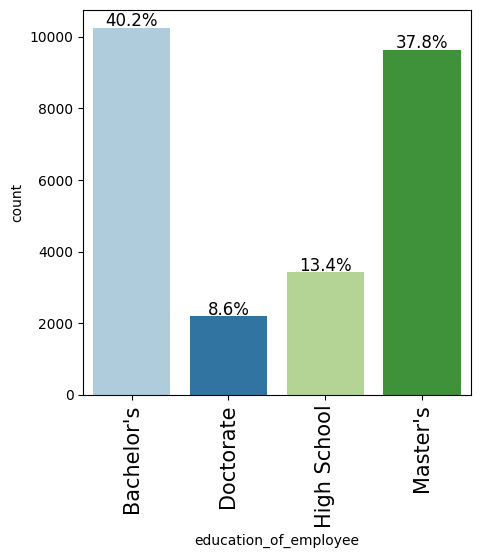

In [22]:
#Observation on Education of Employee using labeled_barplot
labeled_barplot(data=df, feature="education_of_employee", perc=True)


**Observations**
* Employees with Bachelor's Degree are 40.2%
* Employees with Master's degree are 37.8%
* Employess with Doctorate degree are very less around 8.6%

#### Observations on region of employment

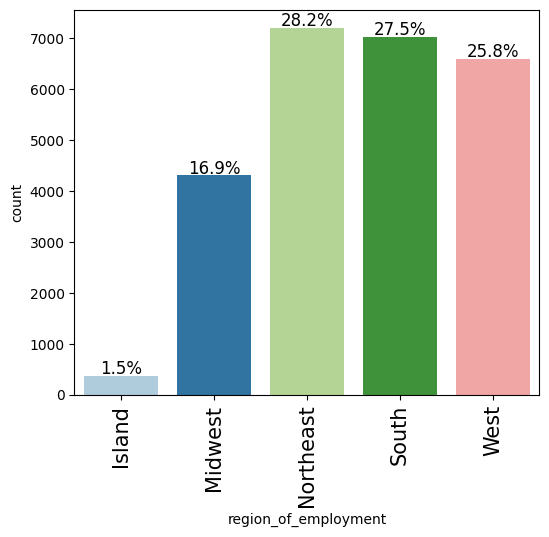

In [23]:
#Observation on Region of Employment using labeled_barplot
labeled_barplot(data=df, feature="region_of_employment", perc=True)

**Observation**

* NorthEast and South region has highest Employment with 28.2% and 27.5%
* The Islan region has minimum employment of about 1.5%

#### Observations on job experience

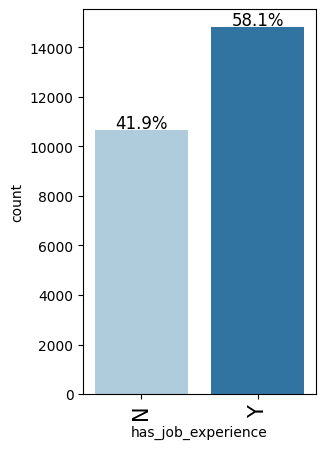

In [24]:
#Observation on has_job_experience using labeled_barplot
labeled_barplot(data=df, feature="has_job_experience", perc=True)

**Observation**
* Almost 58.1% employees has prior job experience

#### Observations on case status

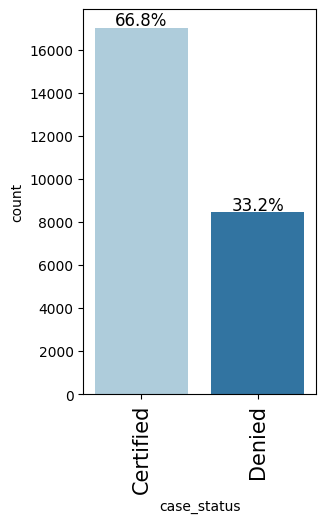

In [25]:
#Observation on case_status using labeled_barplot
labeled_barplot(data=df, feature="case_status", perc=True)

**Observation**
*  66.8% employees has certified Visa and 33.2% employees Visa are denied

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [26]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [27]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


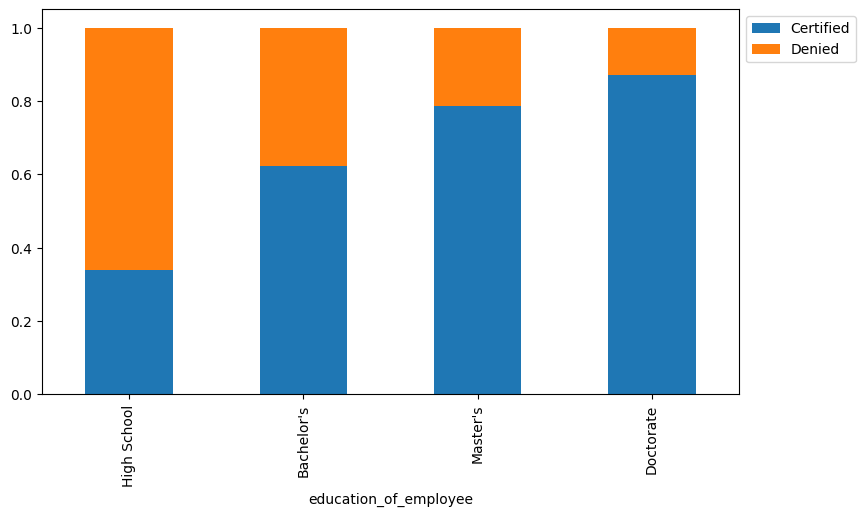

In [28]:
#Checking the stacked barplot for education_of_employee and case status
stacked_barplot(df, "education_of_employee" , "case_status")

**Observation**
*  Higher education correlates with higher certification rates — Doctorate holders have the highest visa certification proportion (~87%).

* Master’s degree holders also have a strong approval rate, with about 78% certified.

* Bachelor’s degree holders have moderate success, with roughly 62% of applications certified.

* High School education shows the lowest certification rate, with denial exceeding certification (about 66% denied).

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


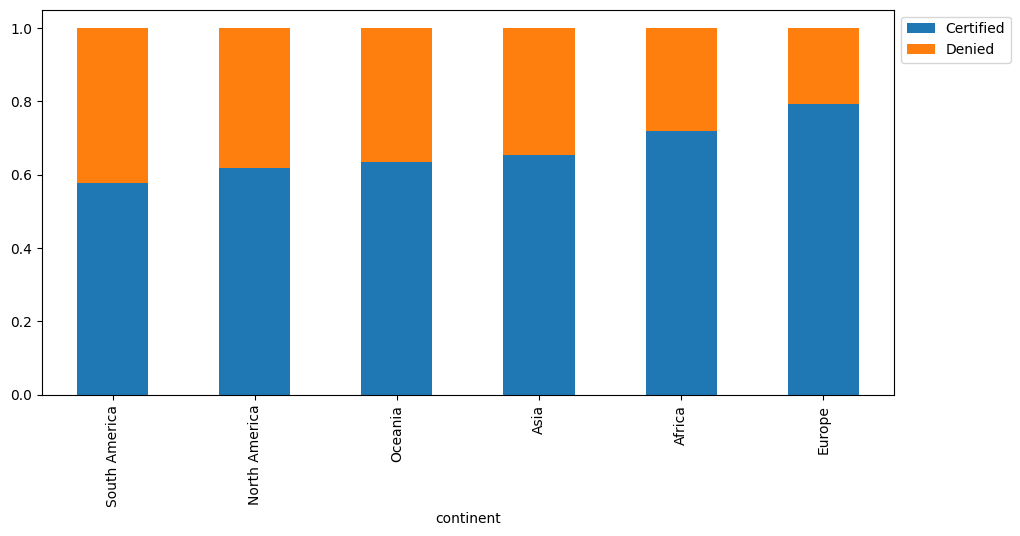

In [29]:
#Checking the stacked barplot for education_of_employee and case status
stacked_barplot(df, "continent" , "case_status")

**Observations**
* Europe Continent employees has greater chance of visabeing certifiec , while South America emp. has lowest .

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


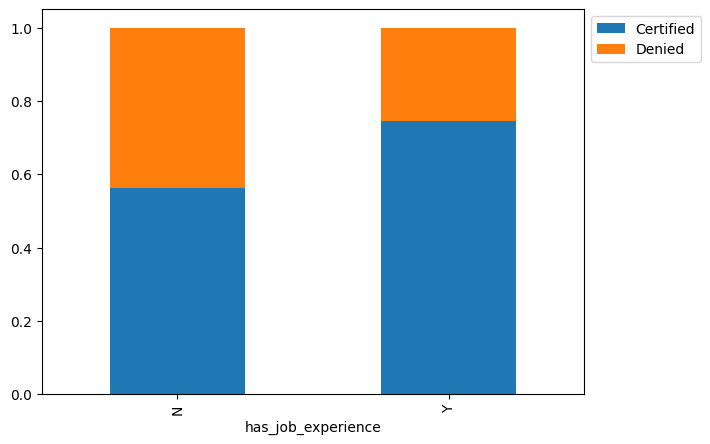

In [30]:
#Checking the stacked barplot for has_job_experience and case status
stacked_barplot(df, "has_job_experience", "case_status")

**Observations**
* Employess with job Experience has higher chance of getting visa certified and travel aborad.

#### Checking if the prevailing wage is similar across all the regions of the US

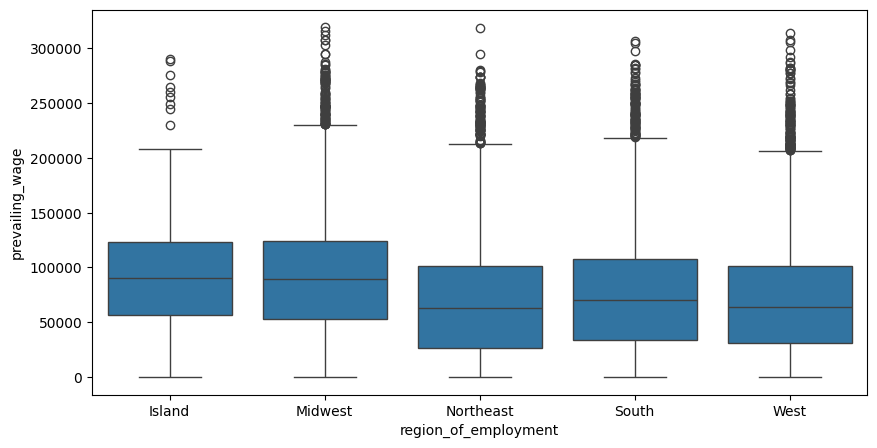

In [31]:
# Checking if the prevailing wage is similar across all the regions of the US
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage")
plt.show()

**Observations**
* Median wages are relatively consistent across all regions, with only minor variations.

* All regions exhibit a wide range of wages, indicating significant variability within each.

* Presence of many outliers in all regions, especially in the upper range, suggests a small number of extremely high-paying jobs.

* The Island region shows the most compact distribution, indicating less wage variability compared to others.

* Overall wage distributions overlap heavily, suggesting no region offers a distinctly different prevailing wage scale.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

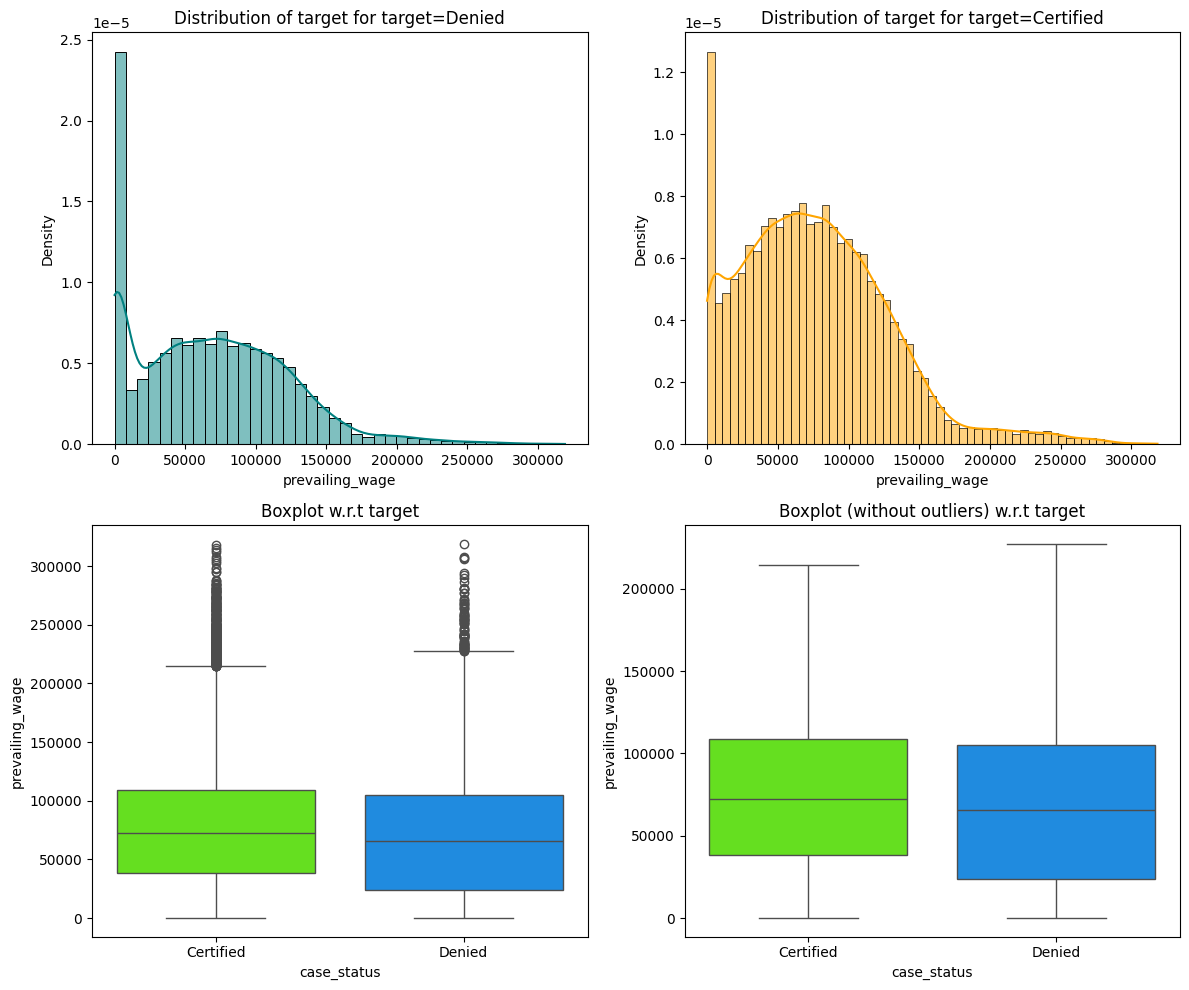

In [32]:
# Checking the distribution of prevailing wage with respect to target
distribution_plot_wrt_target(df,'prevailing_wage','case_status')

**Observations**

* Certified cases generally have higher prevailing wages than denied cases, as seen in both histograms and boxplots.

* Denied applications are more densely concentrated around lower wage ranges, especially below $50,000.

* Certified applications show a broader and more even wage distribution, peaking between $50,000–$100,000.

* The median prevailing wage is noticeably higher for certified cases, as indicated by the position of the boxplot center lines.

* The presence of outliers is significant in both groups, especially on the higher end of the wage spectrum

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


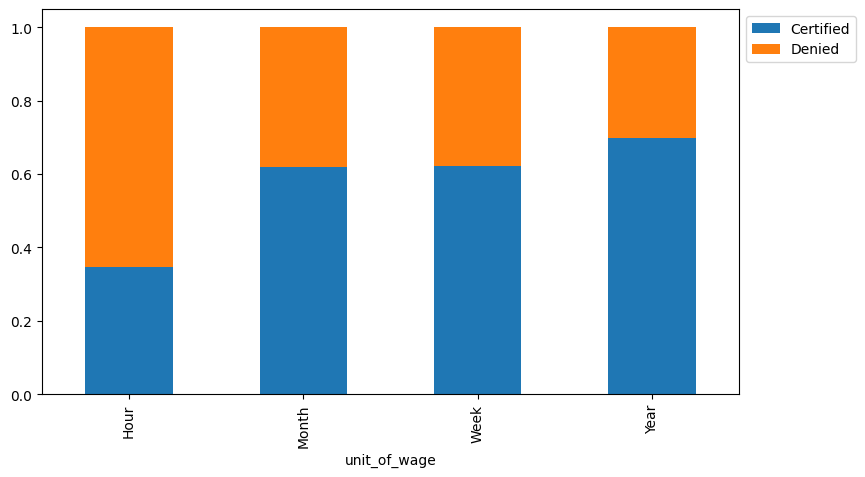

In [33]:
df.loc[df['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()
#Checking the stacked barplot for prevailing_wage and case status
stacked_barplot(df, "unit_of_wage", "case_status")

**Observation**

* Only hourly employees have small or little wages

## Data Pre-processing

### Outlier Check

In [34]:
#Key preprocessing steps include handling missing values, engineering features, detecting and treating outliers, preparing data for modeling, and applying any additional necessary transformations.

In [35]:
#Checking for missing values
df.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


**Observation**

* No null values identied in dataset

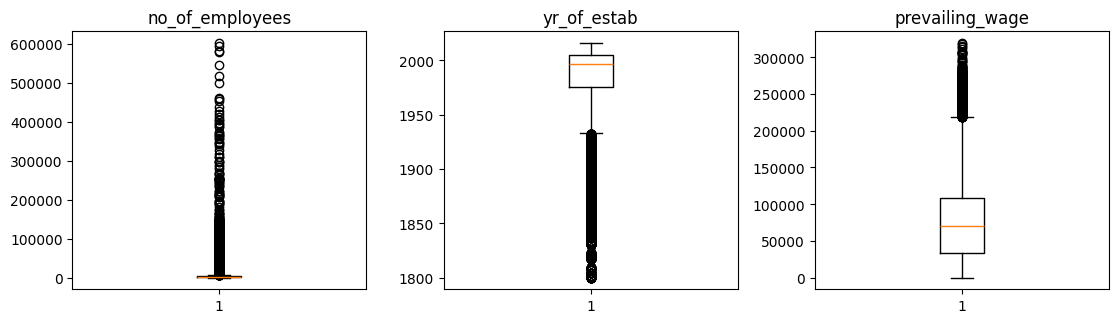

In [36]:
#Checking for outliers in the dataset using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numeric_columns):
 plt.subplot(4, 4, i + 1)
 plt.boxplot(df[variable], whis=1.5)
 plt.tight_layout()
 plt.title(variable)
plt.show()

**Observation**

* The three numerical variables have outliers, however we will not treat them for the following reasons:
* The no of employees can vary depending on the attirbutes like region ,continent and year's of expereicence ,and so it is not unusual to find companies with thousands of employees, especially when they have been in business for many years. We will not treat the no of employees outliers.
* For the year of establishment, it is not unusual that we are seeing companies that are over 200 years old. some companies have been passed on frm generation to generation, while others are just starting.
we will not treat these outliers as they contain valuable information.
* The prevailing wage is recorded without considering the unit of wages, thus, if we treat the outlier shere, we will not capture the information adequately. Prevailing wage also can vary based on many
factors such as the industry or level of education. hence, we will not treat the outliers in this column

### Data Preparation for modeling

In [ ]:
# In order to prepare data for modelling , we would perform the below steps :
# 1. Encode the category type column
#2. Split the data into train and test to evaluate the model

df["case_status"] = (df["case_status"] == "Certified").astype(int)


In [38]:
# Splitting the Data
X = df.drop("case_status", axis=1)
y = df["case_status"]

#generate dummy variables for each categorical variable
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into train and valid with a ration of 7:3
X_train, X_val,y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

# Splitting the dataset into test and valid with a ration of 9:1
X_val, X_test,y_val, y_test = train_test_split(X_val, y_val, test_size=0.1, random_state=1,stratify=y_val)

In [39]:
# Displaying the dimensions of the training and testing feature sets
print(f"Dimensions of the training feature set (X_train): {X_train.shape}")
print(f"Dimensions of the Validation feature set (X_val): {X_val.shape}")
print(f"Dimensions of the testing feature set (X_test): {X_test.shape}")

# Reporting the class distribution within the training labels
print("\nClass distribution in the training labels (y_train):")
print(y_train.value_counts(normalize=True))

# Reporting the class distribution within the validation labels
print("\nClass distribution in the validation labels (y_val):")
print(y_val.value_counts(normalize=True))

# Reporting the class distribution within the testing labels
print("\nClass distribution in the tetsing labels (y_test):")
print(y_test.value_counts(normalize=True))

Dimensions of the training feature set (X_train): (17836, 21)
Dimensions of the Validation feature set (X_val): (6879, 21)
Dimensions of the testing feature set (X_test): (765, 21)

Class distribution in the training labels (y_train):
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64

Class distribution in the validation labels (y_val):
case_status
1    0.66783
0    0.33217
Name: proportion, dtype: float64

Class distribution in the tetsing labels (y_test):
case_status
1    0.667974
0    0.332026
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model Misclassification Scenarios:**

* Predicting visa certification when it is actually denied.

* Predicting visa denial when it is actually certified.

**Which Case Is More Important?**
Both misclassifications are significant:

* False Positive (Predicted Certified, Actually Denied):
An unqualified candidate may be selected, leading to dissatisfaction among employers and potentially displacing more suitable candidates.

* False Negative (Predicted Denied, Actually Certified):
A qualified candidate loses a job opportunity, and the employer misses out on a valuable contributor—negatively impacting both business and the economy.

**Given the impact of both error types, F1 score is an appropriate evaluation metric, as it balances precision and recall by minimizing both false positives and false negatives.**

In [40]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [41]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [111]:
scorer = metrics.make_scorer(metrics.f1_score) #Given the impact of both error types, F1 score is an appropriate evaluation metric, as it balances precision and recall by minimizing both false positives and false negatives.
scorer

make_scorer(f1_score, response_method='predict')

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [170]:
models = [] #Emplty list to score all the models

#Appending models into the list
models.append(("Bagging",BaggingClassifier(random_state=1)))
models.append(("Random Forest",RandomForestClassifier(random_state=1)))
models.append(("XGBoost",XGBClassifier(random_state=1,eval_metric="logloss")))
models.append(("GBM",GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost",AdaBoostClassifier(random_state=1)))
models.append(("dtree",DecisionTreeClassifier(random_state=1)))

results1_original = [] # Emplty list to store all model's CV score
names = [] # Empty list to store name of the models

#loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on trianing dataset:" "\n")

for name,model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scorer)
    results1_original.append(cv_results)
    names.append(name)
    print("{} : {}".format(name, cv_results.mean()))

print("\n" "Model performance on validation dataset:" "\n")

for name,model in models:
  model.fit(X_train,y_train)
  scores = metrics.f1_score(y_val,model.predict(X_val))
  print("{} : {}".format(name,scores))


Cross-Validation performance on trianing dataset:

Bagging : 0.7756586246579394
Random Forest : 0.8037837241749051
XGBoost : 0.8073583989766158
GBM : 0.823039791269532
AdaBoost : 0.8203377989495703
dtree : 0.7410652876513099

Model performance on validation dataset:

Bagging : 0.7675817565350541
Random Forest : 0.7972364702187794
XGBoost : 0.8070320579110651
GBM : 0.8195818459969403
AdaBoost : 0.8158053488839735
dtree : 0.7477497255762898


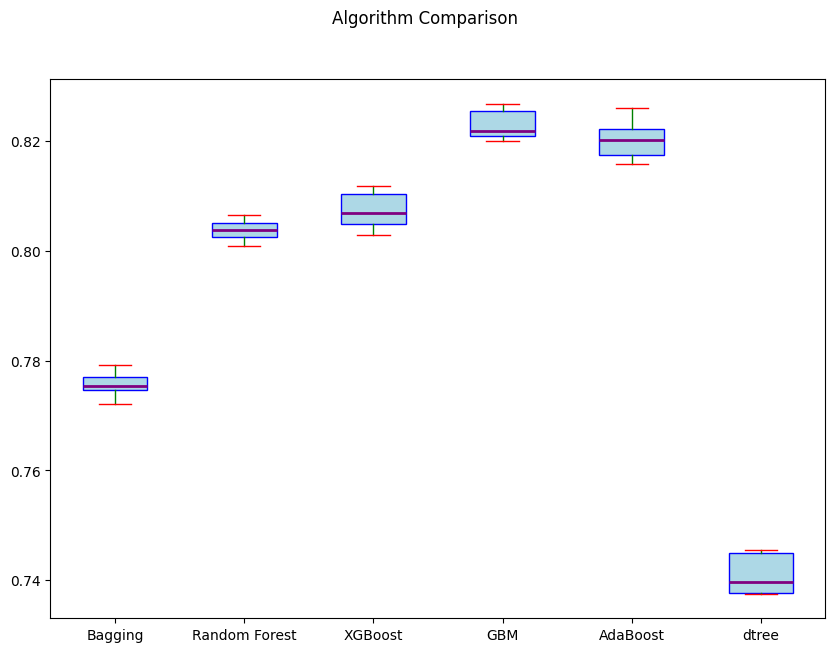

In [159]:
#plotting boxplots for CV scores of all modes used above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results1_original,patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='red'),
            medianprops=dict(color='purple', linewidth=2),
            meanline=True)
ax.set_xticklabels(names)
plt.show()


**Observation (Best Models & Reasons):**


1.   GBM and AdaBoost show the best overall performance:

        * GBM has the highest F1 score on both training (0.823) and validation (0.820) sets, indicating strong generalization with minimal overfitting.

        * AdaBoost also performs well, with high and close scores on training (0.820) and validation (0.816), suggesting consistent performance.

2.   XGBoost is a strong contender:

        * XGBoost achieves balanced performance (Train: 0.807, Val: 0.807), showing robustness and good generalization without overfitting.

3.   Random Forest shows slight overfitting:

        * It performs well on training (0.803) but drops slightly on validation (0.797). Still acceptable, but not as consistent as GBM or XGBoost.

4.   Bagging and Decision Tree are less ideal:

        * Bagging has a noticeable drop from training (0.776) to validation (0.768), indicating weaker generalization.

        * Decision Tree has the lowest F1 scores (Train: 0.741, Val: 0.748), suggesting it's underperforming compared to ensemble methods.

Based on above observation, GBM, AdaBoost and XGBoost are the models which should be considered for hypertuning and further improving the model

### Model Building with oversampled data

In [62]:
print("Before OverSampling, count of label '1' :{}".format(sum(y_train==1)))
print("Before OverSampling, count of label '0' :{}".format(sum(y_train==0)))

# Using Synthetic Minirotiy Over Smapling Technique
sm = SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After OverSampling, count of label '1' :{}".format(sum(y_train_over==1)))
print("After OverSampling, count of label '0' :{}".format(sum(y_train_over==0)))

print("After Oversampling, the of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the of train_y: {}".format(y_train_over.shape))

Before OverSampling, count of label '1' :11913
Before OverSampling, count of label '0' :5923
After OverSampling, count of label '1' :11913
After OverSampling, count of label '0' :11913
After Oversampling, the of train_X: (23826, 21)
After Oversampling, the of train_y: (23826,)


**Observations**
1. Balanced Class Distribution Achieved:

  * Before oversampling, the dataset was imbalanced (class 1: 11,913 vs class 0: 5,923).

  * After applying SMOTE, both classes have equal representation (11,913 each), helping to mitigate bias toward the majority class.

2. Improved Model Training for Minority Class:

  * The model will now have more exposure to samples of the minority class (class 0), improving its ability to correctly classify these cases and reducing the chance of false negatives.

3. Increased Training Set Size:

  * Training data has increased in size to 23,826 rows, potentially increasing the model's capacity to learn—but also possibly increasing training time.

4. Careful Validation Needed:

  * While oversampling improves class balance, it should be followed by robust validation (e.g., stratified k-fold) to ensure that the model is not overfitting to synthetic patterns.

In [158]:
models = [] #Emplty list to score all the models

#Appending models into the list
models.append(("Bagging",BaggingClassifier(random_state=1)))
models.append(("Random Forest",RandomForestClassifier(random_state=1)))
models.append(("XGBoost",XGBClassifier(random_state=1,eval_metric="logloss")))
models.append(("GBM",GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost",AdaBoostClassifier(random_state=1)))
models.append(("dtree",DecisionTreeClassifier(random_state=1)))

results1_over = [] # Emplty list to store all model's CV score
names = [] # Empty list to store name of the models

#loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on OverSample training dataset:" "\n")

for name,model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring=scorer)
    results1_over.append(cv_results)
    names.append(name)
    print("{} : {}".format(name, cv_results.mean()))

print("\n" "Model performance on OverSample validation dataset:" "\n")

for name,model in models:
  model.fit(X_train_over,y_train_over)
  scores = metrics.f1_score(y_val,model.predict(X_val))
  print("{} : {}".format(name,scores))


Cross-Validation performance on OverSample training dataset:

Bagging : 0.7553714301070087
Random Forest : 0.7935193362866556
XGBoost : 0.799430071068073
GBM : 0.8076949280007495
AdaBoost : 0.8013161599972107
dtree : 0.7236479557474234

Model performance on OverSample validation dataset:

Bagging : 0.7606724176067242
Random Forest : 0.7953896584540552
XGBoost : 0.8039950062421972
GBM : 0.8125259228535877
AdaBoost : 0.8120255086547221
dtree : 0.7387687188019967


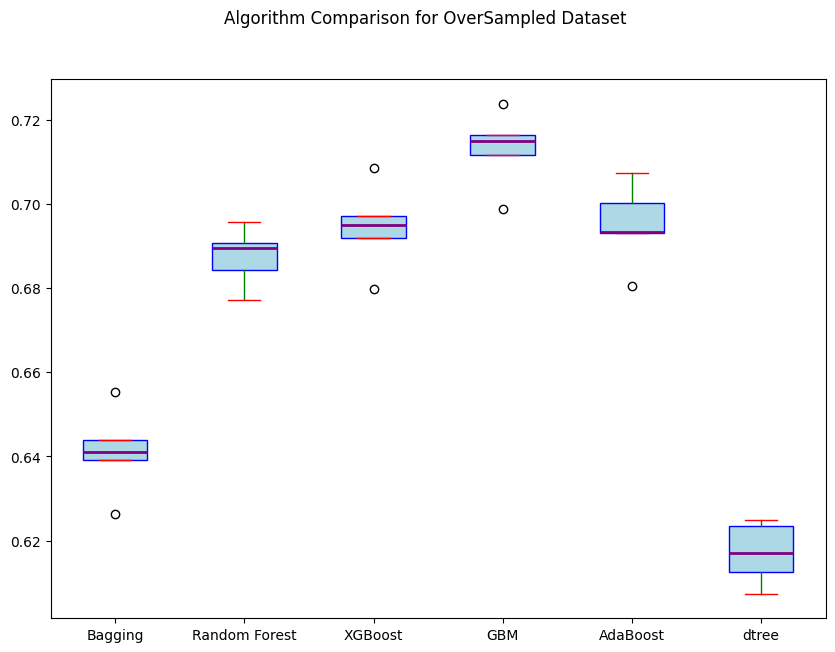

In [74]:
#plotting boxplots for CV scores of all modes used above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison for OverSampled Dataset")
ax = fig.add_subplot(111)
plt.boxplot(results1_over,patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='red'),
            medianprops=dict(color='purple', linewidth=2),
            meanline=True)
ax.set_xticklabels(names)
plt.show()

**Observation (Best Models & Justification):**
1. GBM and AdaBoost are top performers:

  * GBM has the highest F1 on both training (0.808) and validation (0.813), followed closely by AdaBoost (Train: 0.801, Val: 0.812).

  * Their consistently high performance shows strong generalization and the ability to leverage the balanced data effectively.

2. XGBoost performs robustly:

  * XGBoost has very close train and validation F1 scores (Train: 0.799, Val: 0.804), indicating minimal overfitting and reliable performance on unseen data.

3. Random Forest is stable but slightly behind:

  * With F1 scores of 0.794 (train) and 0.795 (validation), it performs well but is marginally less effective than GBM, AdaBoost, and XGBoost on the oversampled dataset.

4. Bagging and Decision Tree underperform:

  * Bagging has lower F1 scores (Train: 0.755, Val: 0.761), suggesting less efficient learning from the oversampled data.

  * Decision Tree performs the worst (Train: 0.724, Val: 0.739), reflecting its limited ability to generalize in comparison to ensemble models.


**Best suited models: GBM, AdaBoost, and XGBoost**


### Model Building with undersampled data

In [66]:
rus = RandomUnderSampler(sampling_strategy=1,random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("After Undersampling, count of label '1' :{}".format(sum(y_train == 1)))
print("After Undersampling, count of label '0' :{}".format(sum(y_train == 0)))

print("After Undersampling, counts of label '1' :{}".format(sum(y_train_under == 1)))
print("After Undersampling, counts of label '0' :{}".format(sum(y_train_under == 0)))

print("After Undersampling, the of train_X: {}".format(X_train_under.shape))
print("After Undersampling, the of train_y: {}".format(y_train_under.shape))

After Undersampling, count of label '1' :11913
After Undersampling, count of label '0' :5923
After Undersampling, counts of label '1' :5923
After Undersampling, counts of label '0' :5923
After Undersampling, the of train_X: (11846, 21)
After Undersampling, the of train_y: (11846,)


**Observations**
1. Balanced Class Distribution Achieved:

  * The dataset was reduced to have equal counts of both classes (class 0 and class 1 = 5,923 each), which addresses the original class imbalance issue.

2. Significant Data Reduction:

  * The total training size dropped to 11,846 samples, resulting in potential loss of informative data, especially from the majority class.

3. Risk of Underfitting:

  * By discarding a large portion of the majority class, the model may miss patterns and variability present in the original data, potentially harming predictive performance.


In [160]:
models = [] #Emplty list to score all the models

#Appending models into the list
models.append(("Bagging",BaggingClassifier(random_state=1)))
models.append(("Random Forest",RandomForestClassifier(random_state=1)))
models.append(("XGBoost",XGBClassifier(random_state=1,eval_metric="logloss")))
models.append(("GBM",GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost",AdaBoostClassifier(random_state=1)))
models.append(("dtree",DecisionTreeClassifier(random_state=1)))

results1_under = [] # Emplty list to store all model's CV score
names = [] # Empty list to store name of the models

#loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on UnderSample training dataset:" "\n")

for name,model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train_under, y_train_under, cv=kfold, scoring=scorer)
    results1_under.append(cv_results)
    names.append(name)
    print("{} : {}".format(name, cv_results.mean()))

print("\n" "Model performance on UnderSample validation dataset:" "\n")

for name,model in models:
  model.fit(X_train_under,y_train_under)
  scores = metrics.f1_score(y_val,model.predict(X_val))
  print("{} : {}".format(name,scores))


Cross-Validation performance on UnderSample training dataset:

Bagging : 0.6411413525524321
Random Forest : 0.6875011408129813
XGBoost : 0.6944693136408734
GBM : 0.7131358906535971
AdaBoost : 0.6949405744215158
dtree : 0.617022679979161

Model performance on UnderSample validation dataset:

Bagging : 0.6916956737941323
Random Forest : 0.734144015259895
XGBoost : 0.7423652871123688
GBM : 0.7608695652173914
AdaBoost : 0.7604202747950584
dtree : 0.6839080459770115


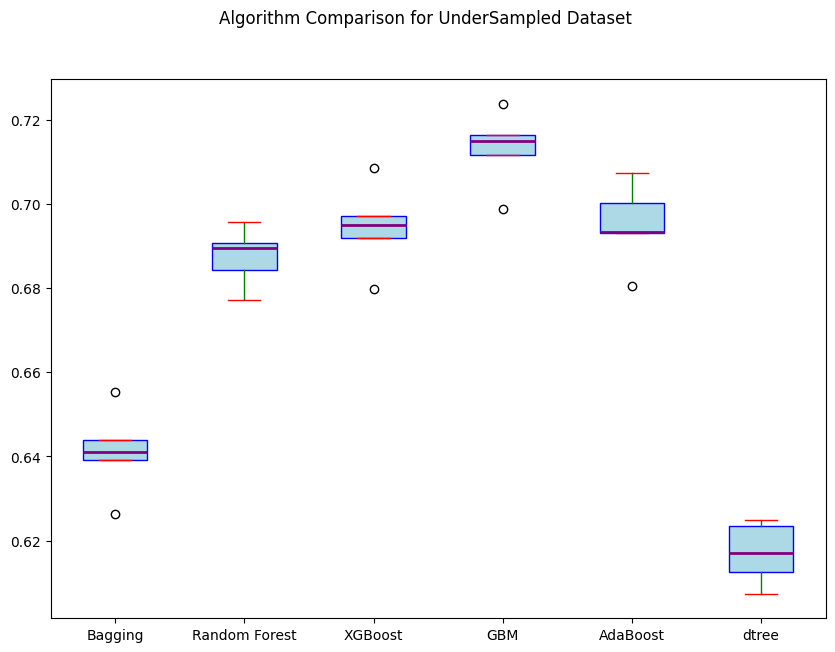

In [70]:
#plotting boxplots for CV scores of all modes used above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison for UnderSampled Dataset")
ax = fig.add_subplot(111)
plt.boxplot(results1_under,patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='red'),
            medianprops=dict(color='purple', linewidth=2),
            meanline=True)
ax.set_xticklabels(names)
plt.show()

**Observations on Model Performance with Undersampled Dataset:**
1. Best Models: GBM and AdaBoost

    * GBM (Train: 0.713, Val: 0.761) and AdaBoost (Train: 0.695, Val: 0.760) achieve the highest F1 scores on the validation set, showing strong performance even with reduced data.

2. XGBoost Performs Consistently Well

  * XGBoost maintains good generalization (Train: 0.694, Val: 0.742), suggesting it's robust even with limited training data from undersampling.

3. Decision Tree and Bagging Lag Behind

  * These models show lower training and validation F1 scores, indicating they are less suited for learning from reduced datasets.


## Comparison Across Sampling Strategies (Best Models):
GBM consistently performs best across original (Val F1: 0.820), oversampled (Val F1: 0.813), and undersampled (Val F1: 0.761) datasets, making it the most reliable and adaptable model regardless of the sampling method.

## Hyperparameter Tuning

## **Tuning Decision Tree using Train Data**

In [121]:
%%time

# Creating pipeline
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,15),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 5, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': np.int64(14)} with CV score=0.8171106313634136:
CPU times: user 4.36 s, sys: 124 ms, total: 4.48 s
Wall time: 13.1 s


In [125]:
# Creating tuned model with best parameters
dtree_tuned1 = DecisionTreeClassifier(
        max_depth=14,
        max_leaf_nodes=5,
        random_state=1,
        min_impurity_decrease=0.001,
        min_samples_leaf=5
    )


# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

In [128]:
#check performance metrics
dtree1_train_perf = model_performance_classification_sklearn(dtree_tuned1,X_train,y_train)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,0.729816,0.910602,0.742912,0.818254


In [127]:
#check performance metrics for validation dataset
dtree1_val_perf = model_performance_classification_sklearn(dtree_tuned1,X_val,y_val)
dtree1_val_perf

,Accuracy,Recall,Precision,F1
0,0.72118,0.9101,0.735315,0.813424


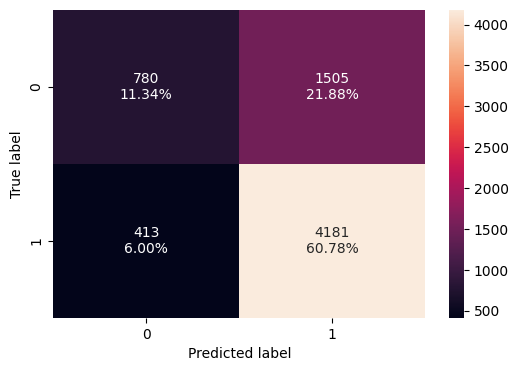

In [129]:
#confusion matrix
confusion_matrix_sklearn(dtree_tuned1,X_val,y_val)

**Observation**

Overall performance of Decision Tree inprovised post tuning . The F1 score isincreased to 0.81.Model is a goot fit with no overfitting




## **Tuning Decision Tree using oversampled Data**

In [120]:
%%time

# Creating pipeline
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,15),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 10, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': np.int64(11)} with CV score=0.7600744050850762:
CPU times: user 5.68 s, sys: 156 ms, total: 5.84 s
Wall time: 15.5 s


In [122]:
# Creating tuned model with best parameters
dtree_tuned2 = DecisionTreeClassifier(
        max_depth=11,
        max_leaf_nodes=10,
        random_state=1,
        min_impurity_decrease=0.001,
        min_samples_leaf=10
    )


# Fit the model on training data
dtree_tuned2.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=10,
                       random_state=1)

In [123]:
#check performance metrics
dtree2_train_perf = model_performance_classification_sklearn(dtree_tuned2,X_train_over,y_train_over)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.762025,0.89012,0.708587,0.789047


In [124]:
#check performance metrics for validation dataset
dtree2_val_perf = model_performance_classification_sklearn(dtree_tuned2,X_val,y_val)
dtree2_val_perf

,Accuracy,Recall,Precision,F1
0,0.721762,0.889856,0.743814,0.810307


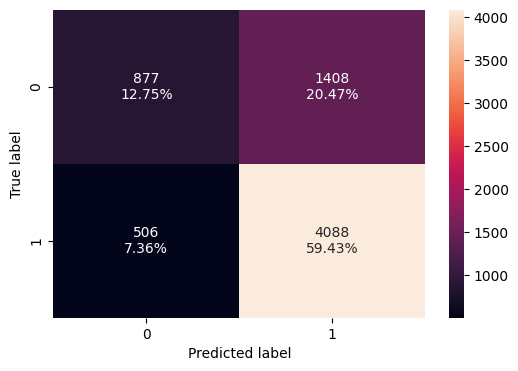

In [118]:
#get confusion matrix
confusion_matrix_sklearn(dtree_tuned2,X_val,y_val)

**Observations**
Hyperparameter tuning of Decision tree with oversampling dataset is improved as the F1 score of validation dataset is around 0.81

## **Tuning Bagging Classfier with train dataset**

In [131]:
%%time


Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.7, 'max_features': 0.8} with CV score=0.8146764061733794:
CPU times: user 1min 48s, sys: 1.15 s, total: 1min 49s
Wall time: 5min 18s


In [132]:
# Creating new bagging classfier model with best parameters
bagg_tuned1 = BaggingClassifier(
        max_features=0.8,
        random_state=1,
        max_samples=0.7,
        n_estimators=50
)

# Fit the model on training data
bagg_tuned1.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.7, n_estimators=50,
                  random_state=1)

In [133]:
#check Performance Matrix
bagg_train_perf = model_performance_classification_sklearn(bagg_tuned1,X_train,y_train)
bagg_train_perf

,Accuracy,Recall,Precision,F1
0,0.992824,0.998825,0.99051,0.99465


In [134]:
#check performance metrics for validation dataset
bagg_val_perf = model_performance_classification_sklearn(bagg_tuned1,X_val,y_val)
bagg_val_perf

,Accuracy,Recall,Precision,F1
0,0.728158,0.867653,0.759527,0.809998


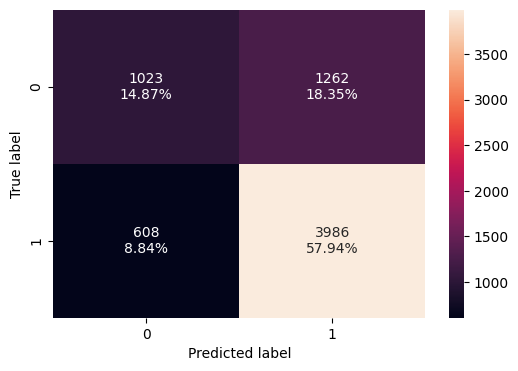

In [135]:
#confusion matrix
confusion_matrix_sklearn(bagg_tuned1,X_val,y_val)

**Observations**
* Model F1 score is significantly higher for train dataset compare to validation dataset. This indicates model is learning the training data too well and is not generalizing well to new or unseen data(validation data). This is a overfitting model which is a problem as its likely to perform poor with real time unseen data

## **Tuning AdaBoost using Train Data**

In [136]:
%%time

#defining Model
Model = AdaBoostClassifier(random_state=1)

#defining parameter grid to pass in RandwomSearchCV
param_grid = {
    "n_estimators": [10, 50, 100,150],
    "learning_rate": [0.0001,0.001,0.01, 0.1],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model,param_distributions=param_grid,n_iter = 50,scoring=scorer,cv=5,random_state=1,n_jobs=-1)

#Fitting the model
randomized_cv.fit(X_train,y_train)

print("Best Parameters: {}".format(randomized_cv.best_params_))
print("Best Score: {}".format(randomized_cv.best_score_))


Best Parameters: {'n_estimators': 150, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}
Best Score: 0.8226388128972134
CPU times: user 2min 51s, sys: 1.71 s, total: 2min 52s
Wall time: 8min 32s


In [139]:
#Creating new model with best parameters
tunded_ada = AdaBoostClassifier(
    random_state=1,
    learning_rate=0.1,
    n_estimators=150,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

tunded_ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=150, random_state=1)

In [140]:
#Calculating training metrics
ada_train_perf = model_performance_classification_sklearn(tunded_ada,X_train,y_train)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.75157,0.877781,0.778514,0.825173


In [141]:
#calculating Validation metrics
ada_val_perf = model_performance_classification_sklearn(tunded_ada,X_val,y_val)
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.741387,0.871136,0.771247,0.818154


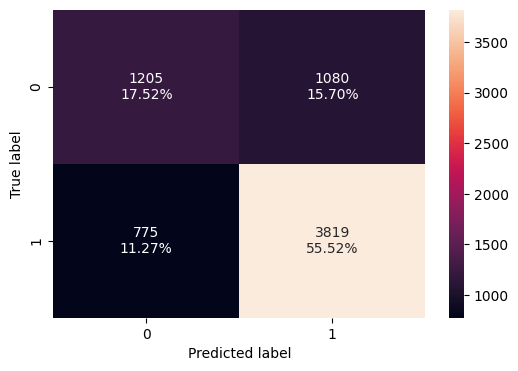

In [138]:
#Reviewing cofusion matrix
confusion_matrix_sklearn(tunded_ada,X_val,y_val)

**Observations**
This model is givng a genralized performance with F1 score slightly higher in train data than validation data

## **Tuning AdaBoost using oversampled Data**

In [76]:
%%time

#defining Model
Model = AdaBoostClassifier(random_state=1)

#defining parameter grid to pass in RandwomSearchCV
param_grid = {
    "n_estimators": [10, 50, 100,150],
    "learning_rate": [0.0001,0.001,0.01, 0.1],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model,param_distributions=param_grid,n_iter = 50,scoring=scorer,cv=5,random_state=1)

#Fitting the model
randomized_cv.fit(X_train_over,y_train_over)

print("Best Parameters: {}".format(randomized_cv.best_params_))
print("Best Score: {}".format(randomized_cv.best_score_))





Best Parameters: {'n_estimators': 150, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}
Best Score: 0.7847788176308029
CPU times: user 10min 15s, sys: 2.11 s, total: 10min 17s
Wall time: 10min 10s


In [142]:
#Creating new model with best parameters
tunded_ada_over = AdaBoostClassifier(random_state=1,learning_rate=0.1,n_estimators=150,estimator=DecisionTreeClassifier(max_depth=3, random_state=1))
tunded_ada_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=150, random_state=1)

In [143]:
#calculating training oversample metrics
ada_train_over_perf = model_performance_classification_sklearn(tunded_ada_over,X_train_over,y_train_over)
ada_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.779275,0.839335,0.749326,0.79178


In [144]:
#calculating validation metrics
ada_val_over_perf = model_performance_classification_sklearn(tunded_ada_over,X_val,y_val)
ada_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.730339,0.831302,0.779547,0.804593


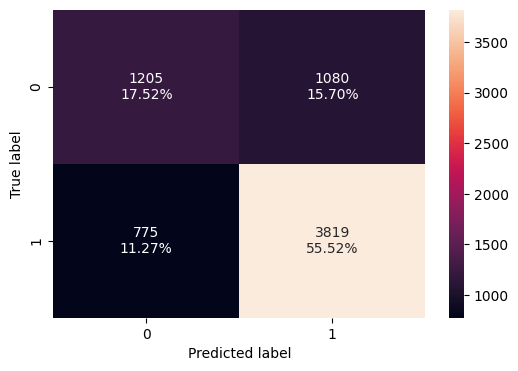

In [145]:
#Checking Confusion Matrix
confusion_matrix_sklearn(tunded_ada_over,X_val,y_val)

### **Observations on AdaBoost (Hypertuned) Validation Metrics:**

1. **Strong Recall and F1 on Validation**:

   * The high recall (0.831) and F1 score (0.805) on the validation set indicate that the model is effective at correctly identifying positive cases and maintaining a balanced trade-off between precision and recall.

2. **Slight Drop in Accuracy but Better F1**:

   * While validation accuracy (0.730) is slightly lower than training (0.779), the F1 score is actually higher, suggesting the model generalizes well and is particularly effective for imbalanced classification tasks.


## **Tuning Random Forest train dataset**

In [146]:
%%time

# Creating Model for RF Classifier for train dataset
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100,150,250],
    "min_samples_leaf": np.arange(1, 6),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "max_samples": np.arange(0.2, 0.6, 0.1),
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'min_samples_leaf': np.int64(4), 'max_samples': np.float64(0.30000000000000004), 'max_features': 'sqrt'} with CV score=0.8261437918811134:
CPU times: user 1min 39s, sys: 1.08 s, total: 1min 40s
Wall time: 4min 27s


In [147]:
tuned_rf1 = RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        random_state=1,
        max_samples=0.3,
        min_samples_leaf=4)
tuned_rf1.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.3, min_samples_leaf=4, random_state=1)

In [148]:
# checking performance metrics
rf1_train_perf = model_performance_classification_sklearn(tuned_rf1,X_train,y_train)
rf1_train_perf

,Accuracy,Recall,Precision,F1
0,0.775903,0.896164,0.794582,0.842321


In [149]:
#checking performance metrics for validation dataset
rf1_val_perf = model_performance_classification_sklearn(tuned_rf1,X_val,y_val)
rf1_val_perf

,Accuracy,Recall,Precision,F1
0,0.741387,0.873095,0.770309,0.818488


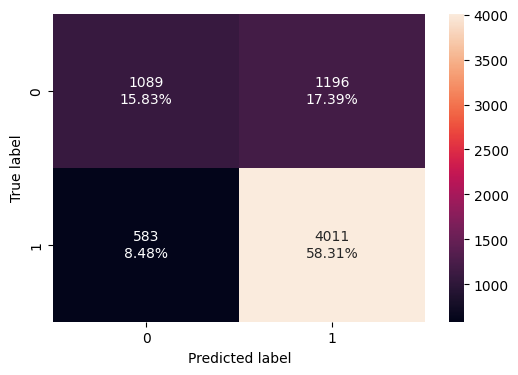

In [150]:
#confusion matrix
confusion_matrix_sklearn(tuned_rf1,X_val,y_val)

**Observations**
* Hypertuning has improved model with F1 score from 0.80 to 0.84 in original training dataset

## **Tuning Random Forest using UnderSampled Data**

In [90]:
%%time

# Creating Model for RF UnderSampled Data
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100,150,250],
    "min_samples_leaf": np.arange(1, 6),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "max_samples": np.arange(0.2, 0.6, 0.1),
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'min_samples_leaf': np.int64(3), 'max_samples': np.float64(0.2), 'max_features': 'sqrt'} with CV score=0.7208403286548949:
CPU times: user 53.9 s, sys: 644 ms, total: 54.5 s
Wall time: 3min 16s


In [91]:
tuned_rf2 = RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        random_state=1,
        max_samples=0.2,
        min_samples_leaf=3)
tuned_rf2.fit(X_train_under,y_train_under)


RandomForestClassifier(max_samples=0.2, min_samples_leaf=3, random_state=1)

In [92]:
#check Performance Metrics
rf2_train_perf = model_performance_classification_sklearn(tuned_rf2,X_train_under,y_train_under)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.755276,0.776633,0.744819,0.760393


In [93]:
#check performance metrics on validation data
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2,X_val,y_val)
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.708097,0.727471,0.81552,0.768983


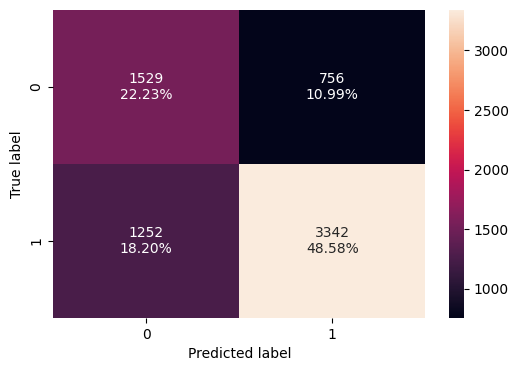

In [94]:
# get confusion matrix
confusion_matrix_sklearn(tuned_rf2,X_val,y_val)

**Observation**

The model shows reasonable generalization, with validation F1 score at 0.769 and precision (0.815) higher than recall (0.727). This suggests the model is more conservative and confident in its positive predictions, which helps reduce false positives.

## **Tuning with Gradient Boosting with Oversampled Data**

In [95]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': np.int64(100), 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8006511041652977:
CPU times: user 2min 41s, sys: 1.76 s, total: 2min 42s
Wall time: 9min 26s


In [100]:
# Creating model with best parameters of Gradient Boosting
tuned_gb = GradientBoostingClassifier(
        learning_rate=0.1,
        max_features=0.7,
        n_estimators=100,
        subsample=0.5,
        random_state=1)
tuned_gb.fit(X_train_over,y_train_over)

GradientBoostingClassifier(max_features=0.7, random_state=1, subsample=0.5)

In [101]:
#check Performance Metrics
gb_train_perf = model_performance_classification_sklearn(tuned_gb,X_train_over,y_train_over)
gb_train_perf

,Accuracy,Recall,Precision,F1
0,0.798246,0.855704,0.767505,0.809208


In [102]:
#check Performance Metrics for valdiation set
gb_val_perf = model_performance_classification_sklearn(tuned_gb,X_val,y_val)
gb_val_perf


,Accuracy,Recall,Precision,F1
0,0.737171,0.84458,0.780056,0.811037


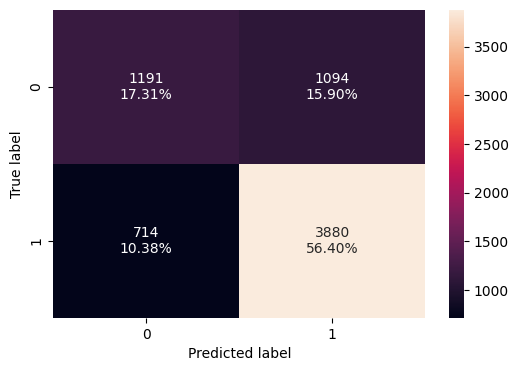

In [103]:
# Create confusion matrix for the tuned GB Model
confusion_matrix_sklearn(tuned_gb,X_val,y_val)

**Observation**
1. F1 Score for tuned Gradient Boosting validation set increased to 0.81 but precison is lower than Recall

## **Tuning XGBoost using Default training Data**

In [151]:
%%time

#Creating XGBoost Tuned Model
Model=XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': np.int64(250), 'learning_rate': 0.01, 'gamma': 5} with CV score=0.8263631193624908:
CPU times: user 48.2 s, sys: 628 ms, total: 48.8 s
Wall time: 2min 13s


In [152]:
xgb_tuned = XGBClassifier(
    random_state = 1,
    eval_metric = 'logloss',
    subsample = 0.7 ,
    n_estimators = 250,
    scale_pos_weight = 1,
    learning_rate = 0.01,
    gamma = 5
)
xgb_tuned.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [153]:
#checking performance metrics
xgb_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.758634,0.889616,0.779953,0.831183


In [154]:
#checking performance metrics for validation
xgb_val_perf = model_performance_classification_sklearn(xgb_tuned,X_val,y_val)
xgb_val_perf

,Accuracy,Recall,Precision,F1
0,0.743277,0.879408,0.769231,0.820638


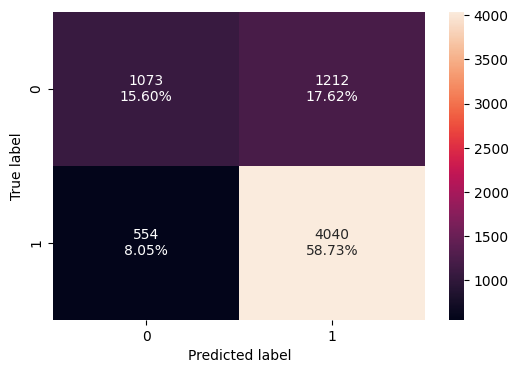

In [155]:
#confusion metrix
confusion_matrix_sklearn(xgb_tuned,X_val,y_val)

## **Tuning XGBoost using oversampled Data**

In [105]:
%%time

#Creating XGBoost Tuned Model
Model=XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 2, 'n_estimators': np.int64(150), 'learning_rate': 0.05, 'gamma': 0} with CV score=0.812666934020122:
CPU times: user 56.6 s, sys: 673 ms, total: 57.3 s
Wall time: 2min 53s


In [106]:
# Define the best tuned XGBoost Model
xgb2_tuned = XGBClassifier(
    random_state = 1,
    eval_metric = 'logloss',
    subsample =1 ,
    n_estimators = 150 ,
    scale_pos_weight = 2,
    learning_rate = 0.05 ,
    gamma = 0
)
xgb2_tuned.fit(X_train_over,y_train_over)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [107]:
# Checking Performance Metrics
xgb2_train_perf = model_performance_classification_sklearn(xgb2_tuned,X_train_over,y_train_over)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.792202,0.953496,0.720932,0.821063


In [108]:
#checking performance metrics on validation dataset
xgb2_val_perf = model_performance_classification_sklearn(xgb2_tuned,X_val,y_val)
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.721617,0.938398,0.725391,0.818259


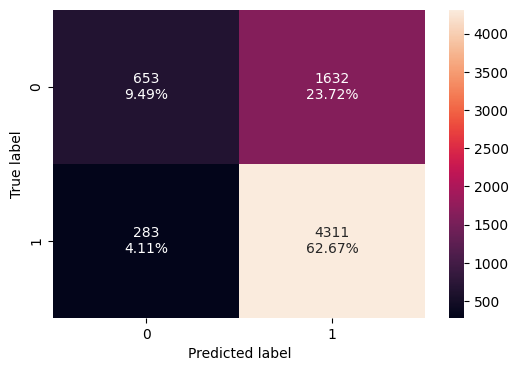

In [109]:
confusion_matrix_sklearn(xgb2_tuned,X_val,y_val)

**Observations on Hyper-Tuned XGBoost (Validation Metrics):**
1. Exceptional Recall, Strong F1 Score:

  * The model achieves very high recall (0.938) and solid F1 score (0.818) on the validation set, showing it effectively identifies most positive cases — ideal for use cases where missing positives is critical.

2. Slight Overfitting, but Acceptable:

  * While training accuracy (0.792) is higher than validation (0.722), the consistency in F1 scores (Train: 0.821, Val: 0.818) suggests the model generalizes well without significant overfitting.



## Model Performances

In [162]:
# training performance comparision

model_train_comp_df = pd.concat([dtree1_train_perf.T,dtree2_train_perf.T,bagg_train_perf.T,ada_train_perf.T,ada_train_over_perf.T,rf1_train_perf.T,rf2_train_perf.T,gb_train_perf.T,xgb_train_perf.T,xgb2_train_perf.T],axis=1)
model_train_comp_df.columns = ["Decision Tree Tuned with Default Data","Decision Tree  Tuned with Oversampled Data","Bagging Classifier  Tuned with Default Data","AdaBoost  Tuned with Default Data","AdaBoost  Tuned with Oversampled Data",
                               "Random Forest  Tuned with Default Data","Random Forest  Tuned with Undersampled Data","Gradient Boosting  Tuned with Oversampled Data","XGBoost  Tuned with Default Data","XGBoost  Tuned with Oversampled Data"]
print("Training Performance Comparision:")
model_train_comp_df
#model_train_comp_df = pd.concat([dtree2_train_perf.T,ada_train_perf.T,rf2_train_perf.T,gb_train_perf.T,xgb2_train_perf.T],axis=1)
#model_train_comp_df.columns = ["Decision Tree Tunes with OverSampled Data","AdaBoost Tuned with Oversampled Data","Random Forest Tuned with undersampled data","Gradient Boosting Tuned with oversampled data","XGBoost Tuned with oversampled data"]
#print("Training Performance Comparision:")
#model_train_comp_df

Training Performance Comparision:


,Decision Tree Tuned with Default Data,Decision Tree Tuned with Oversampled Data,Bagging Classifier Tuned with Default Data,AdaBoost Tuned with Default Data,AdaBoost Tuned with Oversampled Data,Random Forest Tuned with Default Data,Random Forest Tuned with Undersampled Data,Gradient Boosting Tuned with Oversampled Data,XGBoost Tuned with Default Data,XGBoost Tuned with Oversampled Data
Accuracy,0.729816,0.762025,0.992824,0.751570,0.779275,0.775903,0.755276,0.798246,0.758634,0.792202
Recall,0.910602,0.890120,0.998825,0.877781,0.839335,0.896164,0.776633,0.855704,0.889616,0.953496
Precision,0.742912,0.708587,0.990510,0.778514,0.749326,0.794582,0.744819,0.767505,0.779953,0.720932
F1,0.818254,0.789047,0.994650,0.825173,0.791780,0.842321,0.760393,0.809208,0.831183,0.821063


In [164]:
#Validation performance model
model_val_comp_df = pd.concat([dtree1_val_perf.T,dtree2_val_perf.T,bagg_val_perf.T,ada_val_perf.T,ada_val_over_perf.T,rf1_val_perf.T,rf2_val_perf.T,gb_val_perf.T,xgb_val_perf.T,xgb2_val_perf.T],axis=1)
model_val_comp_df.columns = ["Decision Tree Tuned with Default Data","Decision Tree  Tuned with Oversampled Data","Bagging Classifier  Tuned with Default Data","AdaBoost  Tuned with Default Data","AdaBoost  Tuned with Oversampled Data",
                               "Random Forest  Tuned with Default Data","Random Forest  Tuned with Undersampled Data","Gradient Boost Tuned with Oversampled Data","XGBoost  Tuned with Default Data","XGBoost  Tuned with Oversampled Data"]
print("Validation Performance Comparision:")
model_val_comp_df


Validation Performance Comparision:


,Decision Tree Tuned with Default Data,Decision Tree Tuned with Oversampled Data,Bagging Classifier Tuned with Default Data,AdaBoost Tuned with Default Data,AdaBoost Tuned with Oversampled Data,Random Forest Tuned with Default Data,Random Forest Tuned with Undersampled Data,Gradient Boost Tuned with Oversampled Data,XGBoost Tuned with Default Data,XGBoost Tuned with Oversampled Data
Accuracy,0.721180,0.721762,0.728158,0.741387,0.730339,0.741387,0.708097,0.737171,0.743277,0.721617
Recall,0.910100,0.889856,0.867653,0.871136,0.831302,0.873095,0.727471,0.844580,0.879408,0.938398
Precision,0.735315,0.743814,0.759527,0.771247,0.779547,0.770309,0.815520,0.780056,0.769231,0.725391
F1,0.813424,0.810307,0.809998,0.818154,0.804593,0.818488,0.768983,0.811037,0.820638,0.818259


**Observations**
1. Consistently High F1 Score Across Both Sets:

  * Training F1 Score: 0.821063

  * Validation F1 Score: 0.818259
This close match shows strong generalization ability without significant overfitting or underfitting.

2. Top Performer on Validation Set (F1 Focus):

  * Among all models, it has one of the highest validation F1 scores (only marginally behind XGBoost with default data, which shows slightly more overfitting due to larger train-val F1 gap).

3. Balanced Precision and Recall:

  * Validation Precision: 0.725

  * Validation Recall: 0.938
This indicates the model not only captures the majority of actual positives (high recall) but also maintains decent precision — ideal for imbalanced classification tasks.

4. Effective Use of Oversampling:

  * The oversampling strategy has corrected class imbalance, allowing XGBoost to make better-informed splits during training, leading to improved real-world validation performance.

**Summary**
XGBoost Tuned with Oversampled Data is the most reliable model due to its balanced, stable, and high F1 performance, making it well-suited for applications where minimizing both false negatives and false positives is crucial.

In [165]:
# Use Best model on test data
xgb2_test_perf = model_performance_classification_sklearn(xgb2_tuned,X_test,y_test)
xgb2_test_perf

,Accuracy,Recall,Precision,F1
0,0.732026,0.945205,0.731818,0.824936


**Observations**
* Using the identifed best Model , XGBoost oversample model , the test data shows a consistent result of F1 score 0.82 with a recall of 0.94. This alligns with our observation mentioned when identifying this model.

Feature Importance:
no_of_employees: 0.006207565311342478
unit_of_wage_Month: 0.007564869709312916
yr_of_estab: 0.007857115007936954
requires_job_training_Y: 0.00914173386991024
unit_of_wage_Week: 0.009526030160486698
continent_Oceania: 0.009822538122534752
full_time_position_Y: 0.015969878062605858
unit_of_wage_Year: 0.01667080819606781
continent_South America: 0.02722514234483242
prevailing_wage: 0.02876429818570614
education_of_employee_Doctorate: 0.029178954660892487
continent_North America: 0.030459485948085785
has_job_experience_Y: 0.03136909380555153
education_of_employee_Master's: 0.03417910635471344
continent_Europe: 0.04851454123854637
region_of_employment_West: 0.053081076592206955
continent_Asia: 0.0791899710893631
region_of_employment_Midwest: 0.0800541341304779
region_of_employment_Northeast: 0.08129788190126419
region_of_employment_South: 0.09294182062149048
education_of_employee_High School: 0.30098384618759155


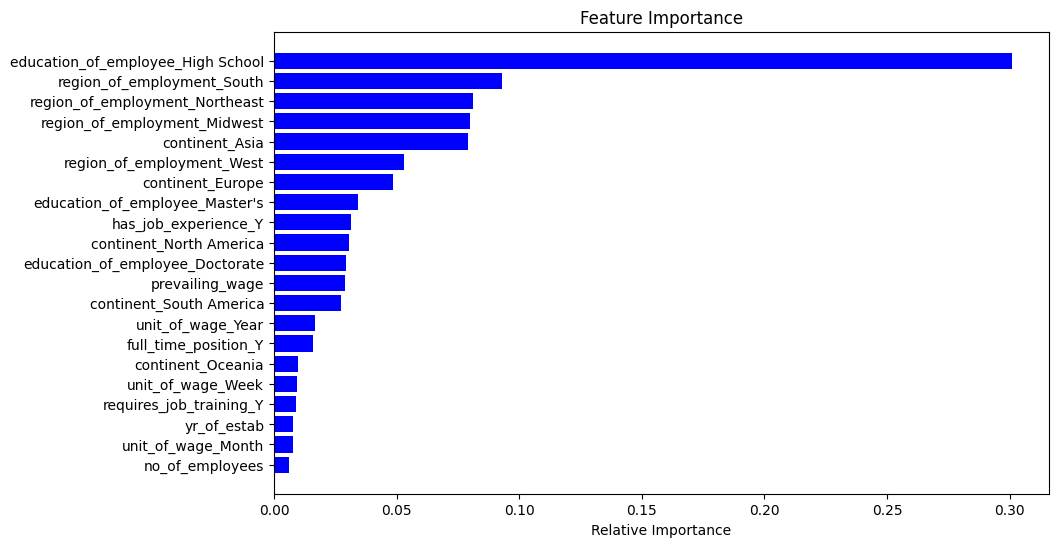

In [169]:
#Checking the important features in the most preferred model
feature_names = X_train.columns
feature_importances = xgb2_tuned.feature_importances_
indices = np.argsort(feature_importances)
print("Feature Importance:")
for i in range(len(feature_names)):
    print(f"{feature_names[indices[i]]}: {feature_importances[indices[i]]}")
# Plot the feature ranking

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), feature_importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### **Observations from Feature Importance **

1. **Education Level is the Most Influential Factor:**

   * `education_of_employee_High School` holds the **highest feature importance (0.30)**, indicating that lower educational qualifications are **strongly associated with visa decisions**.
   * Other degrees like **Master’s** and **Doctorate** also show significant influence.

2. **Region of Employment is Critical:**

   * Regions such as the **South (0.093)**, **Northeast (0.081)**, and **Midwest (0.080)** are more impactful than others, suggesting location-specific demand or visa policy preferences.

3. **Continent of Origin Plays a Role:**

   * Applicants from **Asia (0.079)** and **Europe (0.049)** have higher importance scores, indicating potential regional demand or favorable trends in certification from these continents.

4. **Job Characteristics Matter:**

   * Whether the position is **full-time** (`full_time_position_Y`: 0.016) or **requires experience** (`has_job_experience_Y`: 0.031) significantly impacts certification outcomes.

5. **Wage Unit Type Has Low Impact:**

   * Variables like `unit_of_wage_Week`, `unit_of_wage_Month`, and `unit_of_wage_Year` have **relatively low importance**, implying wage format has **less impact** on certification.

## Actionable Insights and Recommendations


#### 1. **Applicants whose visa Likely to be Certified:**

* **Profile Characteristics:**

  * Hold a **Master’s, Doctorate, or High School degree** (top education importance scores).
  * Have **prior job experience** and apply for a **full-time position**.
  * Apply in **regions with higher demand** (South, Northeast, Midwest).
  * Originate from **Asia or Europe**, based on higher importance of these regions.

* **Recommendations:**

  * Emphasize and document **educational credentials and experience** clearly.
  * Target jobs in **key employment regions**.
  * Prefer full-time roles to increase certification chances.



#### 2. **Applicants whose visa at Risk of Denial:**

* **Profile Characteristics:**

  * Hold minimal or unrecognized education credentials.
  * Lack prior job experience or apply for **part-time roles**.
  * Apply in **regions like Oceania or South America** or less influential wage units.

* **Recommendations:**

  * Upskill to **higher educational qualifications** (Master’s or above).
  * Gain **relevant work experience** before applying.
  * Consider applying in **regions with higher demand** and **full-time roles** to improve chances.



### **Conclusion:**

The feature importance analysis clearly shows that **education level, employment region, job experience, prevailing wage and continent of origin** are decisive factors in visa certification. By aligning with these key attributes, applicants can significantly enhance their visa approval probability.


<font size=6 color='blue'>Power Ahead</font>
___